In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0, 100, (5,5))

In [4]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [7]:
rand_b = np.random.uniform(0, 100, (5,5))

In [8]:
rand_b

array([[99.43179012, 52.06653967, 57.87895355, 73.48190583, 54.19617722],
       [91.31535577, 80.7920151 , 40.29978307, 35.72243428, 95.28767147],
       [34.36315779, 86.50998163, 83.02777122, 53.81614492, 92.24693726],
       [ 9.71464798, 10.28474932, 70.15072957, 89.04798691, 15.95603009],
       [27.55725449, 67.24915297, 16.4303124 , 70.13711366, 48.76352222]])

In [9]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
mul_op = a * b

In [19]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mul_result)
    

[[151.07166  109.1333    60.726376  90.63407  122.72388 ]
 [174.70505  111.48864  129.66109  107.87682  114.28157 ]
 [ 89.78592  121.723175 101.21701  132.37631  188.79526 ]
 [ 32.950016  18.640892 130.50557  161.94727   43.57991 ]
 [ 96.08789  119.035904  21.278767  83.92404   67.460266]]
[[5134.644    2971.2686    164.80583  1260.3738   3713.9392  ]
 [7614.759    2480.042    3601.2412   2577.5305   1809.884   ]
 [1904.5011   3046.2927   1510.212    4227.8057   8906.287   ]
 [ 225.72342    85.940834 4233.936    6491.534     440.7675  ]
 [1888.5161   3482.615      79.661606  966.97504   911.71906 ]]


array([[151.07166 , 109.1333  ,  60.726376,  90.63407 , 122.72388 ],
       [174.70505 , 111.48864 , 129.66109 , 107.87682 , 114.28157 ],
       [ 89.78592 , 121.723175, 101.21701 , 132.37631 , 188.79526 ],
       [ 32.950016,  18.640892, 130.50557 , 161.94727 ,  43.57991 ],
       [ 96.08789 , 119.035904,  21.278767,  83.92404 ,  67.460266]],
      dtype=float32)

## Example Neural Network

In [20]:
n_features = 10
n_dense_neurons = 3

In [21]:
x = tf.placeholder(tf.float32, (None, n_features))

In [22]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [23]:
xW = tf.matmul(x, W)

In [24]:
z = tf.add(xW, b)

In [25]:
a = tf.sigmoid(z)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [28]:
layer_out

array([[0.5571275, 0.8654362, 0.693713 ]], dtype=float32)

## Simple Regression Example

In [29]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [30]:
x_data

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [31]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [32]:
y_label

array([0.93679768, 1.62189237, 2.67752533, 3.10704016, 4.91423045,
       4.68304005, 7.14644022, 7.86664797, 9.63445   , 8.78127057])

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

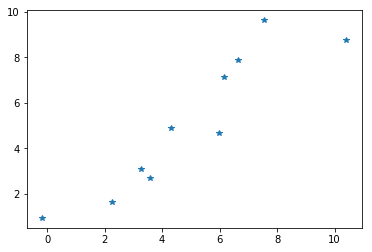

In [35]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [36]:
np.random.rand(2)

array([0.78452185, 0.68724204])

In [37]:
m = tf.Variable(0.78)
b = tf.Variable(0.68)

In [38]:
error = 0

In [39]:
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [40]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [41]:
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

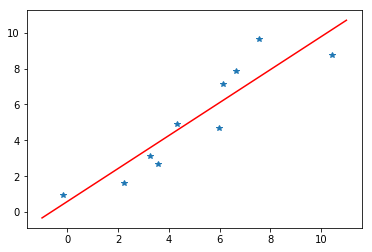

In [47]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')